## Left to do:
- p value of the biased
- average cooperation on s>t of the different methods
- Download images
- Spelling mistakes
- Add more reps
- Methods: porcentages of short answers correct, plots of both prompts

In [771]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [721]:
## EXPERIMENTAL LLM MATRICES
models = ['llama', 'mistral', 'qwen']
versions = ['woman', 'man', 'nb', 'white', 'black', 'ME', 'asian','oneeuro', '100euro', '10keuro']
matrices_llm = {}
matrices_rep = {}
reps = ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23',
        '24','25','26','27','28','29','30','31','32','33','34','35','37','38','39','40','41','42','43','44',
       '45','46','47','48','49','50']

for model in models:
    for version in versions:
        matrix1 = np.loadtxt(f"{model}_{version}1.txt")
        matrix2 = np.loadtxt(f"{model}_{version}2.txt")
        matrix = (matrix1 + matrix2)/2
        key = f"{model}_{version}"
        matrices_llm[key] = matrix
        
for model in models:
    matrix1 = np.loadtxt(f"{model}10rep_final1.txt")
    matrix2 = np.loadtxt(f"{model}10rep_final2.txt")
    matrix = (matrix1 + matrix2)/2
    key = f"{model}_final"
    matrices_llm[key] = matrix

for model in ['mistral', 'qwen']:
    for version in ['right', 'left']:
        matrix1 = np.loadtxt(f"{model}_{version}1.txt")
        matrix2 = np.loadtxt(f"{model}_{version}2.txt")
        matrix = (matrix1 + matrix2)/2
        key = f"{model}_{version}"
        matrices_llm[key] = matrix
  
extractions = {'simple', 'extract', 'multi'}
for model in models:
    for extract in extractions:
        key = f"{model}_{extract}"
        matrices_llm[key] =  np.loadtxt(f"{model}_{extract}.txt")

for model in models:
    for rep in reps:
        key = f"{model}_final{rep}"
        matrices_rep[key] = np.loadtxt(f"{model}_finalr{rep}.txt")

In [723]:
## THEORETICAL AND HUMAN MATRICES
comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
matrices_theoretical = {}
for element in comparison:
    matrices_theoretical[element] = np.loadtxt(f"matrix_{element}")

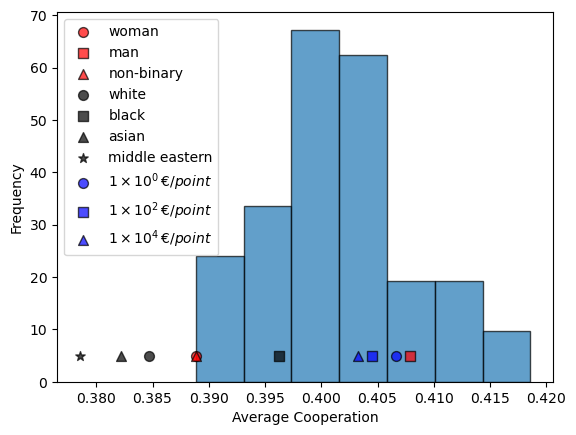

In [849]:
## HISTOGRAMS OF LLAMA AVERAGE COOPERATION
cooperation_llama = []
cooperation_llama.append(np.mean(matrices_llm['llama_final']))
for rep in reps:
    key = f"llama_final{rep}"
    matrix = matrices_rep[key]
    cooperation_llama.append(np.mean(matrix))
# Cooperation for all the biasing
plt.scatter(np.mean(matrices_llm['llama_woman']), 5, color="red",marker="o",edgecolors='black', zorder=5, s=50, alpha = 0.7, label="woman")
plt.scatter(np.mean(matrices_llm['llama_man']), 5, color="red",marker="s",edgecolors='black', zorder=5, s=50, alpha = 0.7,label="man")
plt.scatter(np.mean(matrices_llm['llama_nb']), 5, color="red",marker="^" ,edgecolors='black',zorder=5, s=50, alpha = 0.7,label="non-binary")
plt.scatter(np.mean(matrices_llm['llama_white']), 5, color="black",marker="o",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="white")
plt.scatter(np.mean(matrices_llm['llama_black']), 5, color="black",marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7,label="black")
plt.scatter(np.mean(matrices_llm['llama_asian']), 5, color="black",marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="asian")
plt.scatter(np.mean(matrices_llm['llama_ME']), 5, color="black", marker="*",edgecolors='black',zorder=5, s=50,  alpha = 0.7,label="middle eastern")
plt.scatter(np.mean(matrices_llm['llama_oneeuro']), 5, color="blue",marker="o" ,edgecolors='black',zorder=5, s=50,  alpha = 0.7, label=r"$1\times10^{0}\,€/point$")
plt.scatter(np.mean(matrices_llm['llama_100euro']), 5, color="blue", marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{2}\,€/point$")
plt.scatter(np.mean(matrices_llm['llama_10keuro']), 5, color="blue", marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{4}\,€/point$")

counts, bins, patches = plt.hist(cooperation_llama, edgecolor='black', bins =7, alpha = 0.7, density = True)
plt.xlabel('Average Cooperation')
plt.ylabel('Frequency')
plt.legend(loc ='upper left')
plt.savefig('histogramllama.jpg')
plt.show()

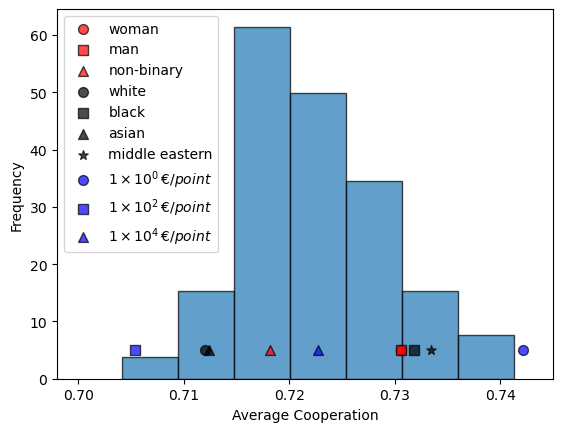

In [855]:
## HISTOGRAMS OF MISTRAL AVERAGE COOPERATION
cooperation_mistral = []
cooperation_mistral.append(np.mean(matrices_llm['mistral_final']))
for rep in reps:
    key = f"mistral_final{rep}"
    matrix = matrices_rep[key]
    cooperation_mistral.append(np.mean(matrix))
# Cooperation for all the biasing
plt.scatter(np.mean(matrices_llm['mistral_woman']), 5, color="red",marker="o",edgecolors='black', zorder=5, s=50, alpha = 0.7, label="woman")
plt.scatter(np.mean(matrices_llm['mistral_man']), 5, color="red",marker="s",edgecolors='black', zorder=5, s=50, alpha = 0.7,label="man")
plt.scatter(np.mean(matrices_llm['mistral_nb']), 5, color="red",marker="^" ,edgecolors='black',zorder=5, s=50, alpha = 0.7,label="non-binary")
plt.scatter(np.mean(matrices_llm['mistral_white']), 5, color="black",marker="o",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="white")
plt.scatter(np.mean(matrices_llm['mistral_black']), 5, color="black",marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7,label="black")
plt.scatter(np.mean(matrices_llm['mistral_asian']), 5, color="black",marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="asian")
plt.scatter(np.mean(matrices_llm['mistral_ME']), 5, color="black", marker="*",edgecolors='black',zorder=5, s=50,  alpha = 0.7,label="middle eastern")
plt.scatter(np.mean(matrices_llm['mistral_oneeuro']), 5, color="blue",marker="o" ,edgecolors='black',zorder=5, s=50,  alpha = 0.7, label=r"$1\times10^{0}\,€/point$")
plt.scatter(np.mean(matrices_llm['mistral_100euro']), 5, color="blue", marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{2}\,€/point$")
plt.scatter(np.mean(matrices_llm['mistral_10keuro']), 5, color="blue", marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{4}\,€/point$")

plt.hist(cooperation_mistral, bins = 7, edgecolor='black', alpha = 0.7, density = True)
plt.xlabel('Average Cooperation')
plt.ylabel('Frequency')
plt.xlim([0.698,0.745])
plt.legend(loc = 'upper left')
plt.savefig('histogrammistral.jpg')
plt.show()

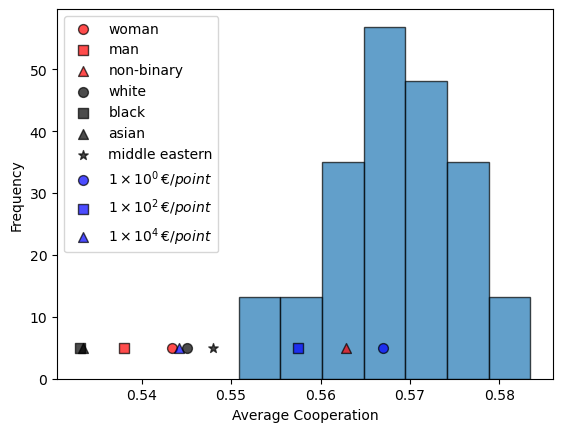

In [819]:
## HISTOGRAMS OF QWEN AVERAGE COOPERATION
cooperation_qwen = []
cooperation_qwen.append(np.mean(matrices_llm['qwen_final']))
for rep in reps:
    key = f"qwen_final{rep}"
    matrix = matrices_rep[key]
    cooperation_qwen.append(np.mean(matrix))
# Cooperation for all the biasing
plt.scatter(np.mean(matrices_llm['qwen_woman']), 5, color="red",marker="o",edgecolors='black', zorder=5, s=50, alpha = 0.7, label="woman")
plt.scatter(np.mean(matrices_llm['qwen_man']), 5, color="red",marker="s",edgecolors='black', zorder=5, s=50, alpha = 0.7,label="man")
plt.scatter(np.mean(matrices_llm['qwen_nb']), 5, color="red",marker="^" ,edgecolors='black',zorder=5, s=50, alpha = 0.7,label="non-binary")
plt.scatter(np.mean(matrices_llm['qwen_white']), 5, color="black",marker="o",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="white")
plt.scatter(np.mean(matrices_llm['qwen_black']), 5, color="black",marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7,label="black")
plt.scatter(np.mean(matrices_llm['qwen_asian']), 5, color="black",marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label="asian")
plt.scatter(np.mean(matrices_llm['qwen_ME']), 5, color="black", marker="*",edgecolors='black',zorder=5, s=50,  alpha = 0.7,label="middle eastern")
plt.scatter(np.mean(matrices_llm['qwen_oneeuro']), 5, color="blue",marker="o" ,edgecolors='black',zorder=5, s=50,  alpha = 0.7, label=r"$1\times10^{0}\,€/point$")
plt.scatter(np.mean(matrices_llm['qwen_100euro']), 5, color="blue", marker="s",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{2}\,€/point$")
plt.scatter(np.mean(matrices_llm['qwen_10keuro']), 5, color="blue", marker="^",edgecolors='black',zorder=5, s=50, alpha = 0.7, label=r"$1\times10^{4}\,€/point$")

counts, bins, patches = plt.hist(cooperation_qwen, bins = 7, edgecolor='black', alpha = 0.7, density = True)
plt.xlabel('Average Cooperation')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('histogramqwen.jpg')
plt.show()

{'human': 0.031157024793388426, 'nash': 0.08860413223140495, 'optimist': 0.11324380165289258, 'envious': 0.11283057851239668, 'pessimist': 0.19671487603305787, 'trustful': 0.44506198347107445}


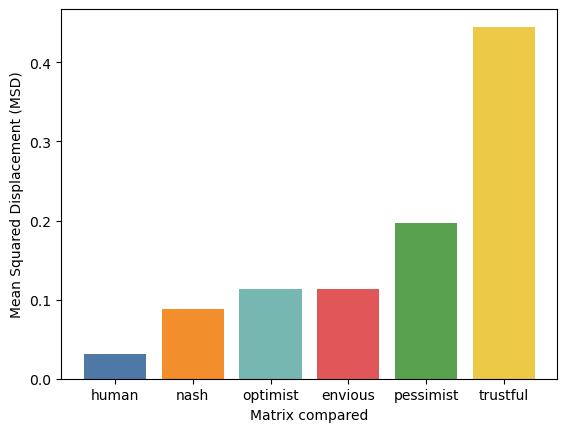

In [825]:
## LLAMA VS PHENOTYPES
colors = ["#4E79A7",  
          "#F28E2B",  
          "#76B7B2",  
          "#E15759", 
          "#59A14F",
          "#EDC948"] 

comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
diff_llama = {}
for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['llama_final'] - matrices_theoretical[element])**2)

print(diff_llama)

plt.bar(diff_llama.keys(), diff_llama.values(), color = colors)
plt.ylabel('Mean Squared Displacement (MSD)')
plt.xlabel('Matrix compared')
plt.savefig('msdllama.jpg')
plt.show()

{'human': 0.8921016458600193, 'nash': 0.7652542790634401, 'optimist': 0.734166193719106, 'envious': 0.7862078845359601, 'pessimist': 0.45902413225109256, 'trustful': nan}


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


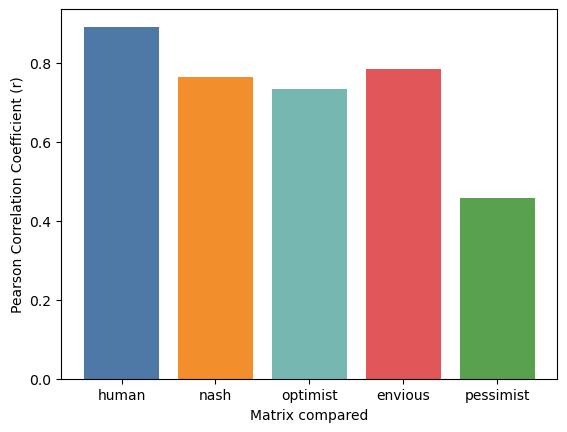

In [827]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['llama_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonllama.jpg')
plt.show()

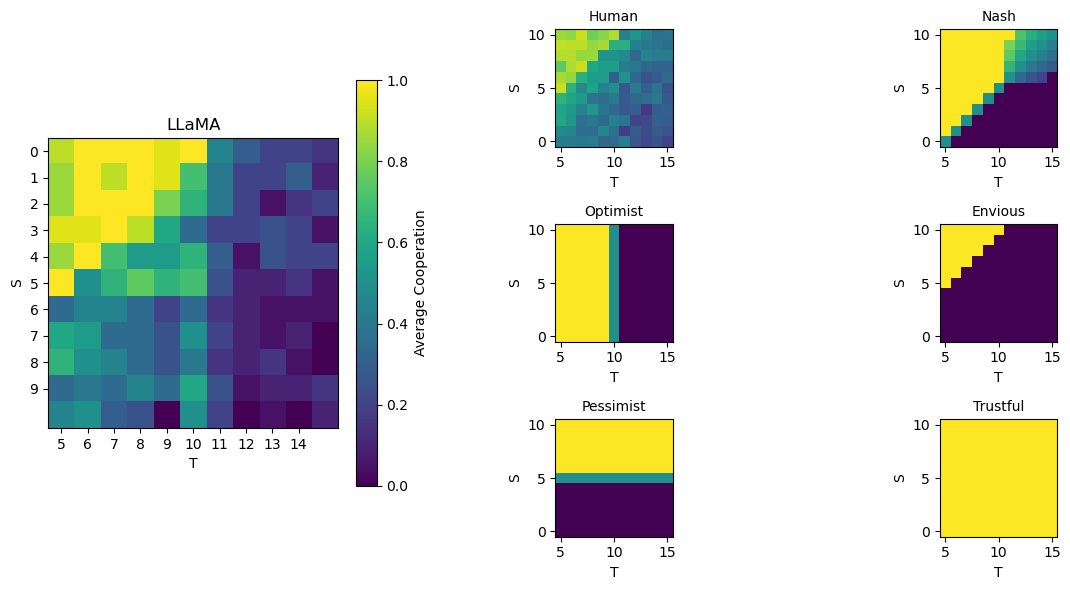

In [892]:
cmap = plt.cm.viridis

fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1)
ax1 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

small_plots = [
    (ax1, matrices_theoretical['human'], "Human"),
    (ax2, matrices_theoretical['nash'], "Nash"),
    (ax3, matrices_theoretical['optimist'], "Optimist"),
    (ax4, matrices_theoretical['envious'], "Envious"),
    (ax5, matrices_theoretical['pessimist'], "Pessimist"),
    (ax6, matrices_theoretical['trustful'], "Trustful")
]

# Títol principal
#fig.suptitle("Comparison of Cooperation Matrices: LLaMA vs. Phenotypes, Humans and Nash equilibrium", fontsize=16, fontweight='bold')

# Heatmap gran (LLaMA)
im0 = ax0.imshow(matrices_llm['llama_final'], aspect='equal', cmap=cmap, vmin=0, vmax=1)
ax0.set_xlabel("T")
ax0.set_ylabel("S")
ax0.set_title("LLaMA", fontsize=12)
fig.colorbar(im0, ax=ax0, shrink=0.8, pad=0.05, label="Average Cooperation")

# Configuració dels ticks per al gràfic gran
ax0.set_xticks(np.arange(10)) # Neteja els ticks actuals
ax0.set_xticklabels(np.arange(5, 15)) # Posa les etiquetes de T de 5 a 15
ax0.set_yticks(np.arange(10))
ax0.set_yticklabels(np.arange(0, 10))

# Heatmaps petits (teòrics)
for ax, data, title in small_plots:
    im = ax.imshow(data, aspect='equal', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    
    # Per a l'eix X (T)
    ax.set_xticks([0, 5, 10])
    ax.set_xticklabels([5, 10, 15])
    
    # Per a l'eix Y (S)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels([10, 5, 0])
    
    # Afegir les etiquetes T i S a cada gràfic petit
    ax.set_xlabel("T")
    ax.set_ylabel("S")

plt.tight_layout()
plt.savefig('comparellamaphenotypes.jpg')
plt.show()

{'human': 0.09117355371900825, 'nash': 0.1820917355371901, 'optimist': 0.17774793388429752, 'envious': 0.4157644628099174, 'pessimist': 0.2533677685950413, 'trustful': 0.1165909090909091}


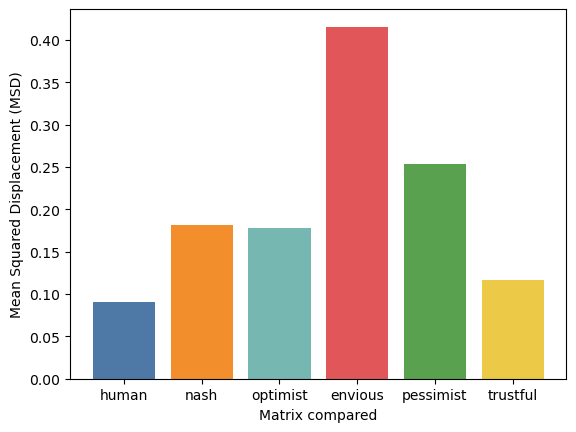

In [829]:
## MISTRAL VS PHENOTYPES
colors = ["#4E79A7",  
          "#F28E2B",  
          "#76B7B2",  
          "#E15759", 
          "#59A14F",
          "#EDC948"] 

comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
diff_llama = {}
for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['mistral_final'] - matrices_theoretical[element])**2)
print(diff_llama)

plt.bar(diff_llama.keys(), diff_llama.values(), color = colors)
plt.ylabel('Mean Squared Displacement (MSD)')
plt.xlabel('Matrix compared')
plt.savefig('msdmistral.jpg')
plt.show()

{'human': 0.6946072141332863, 'nash': 0.5989003306583442, 'optimist': 0.7350720453427027, 'envious': 0.5364764585528723, 'pessimist': 0.3634748511501212, 'trustful': nan}


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


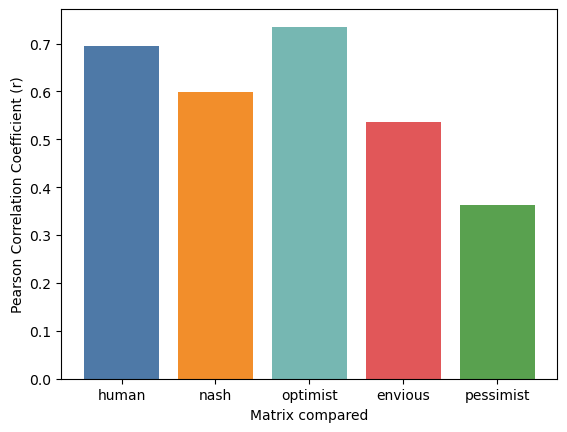

In [831]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['mistral_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonmistral.jpg')
plt.show()

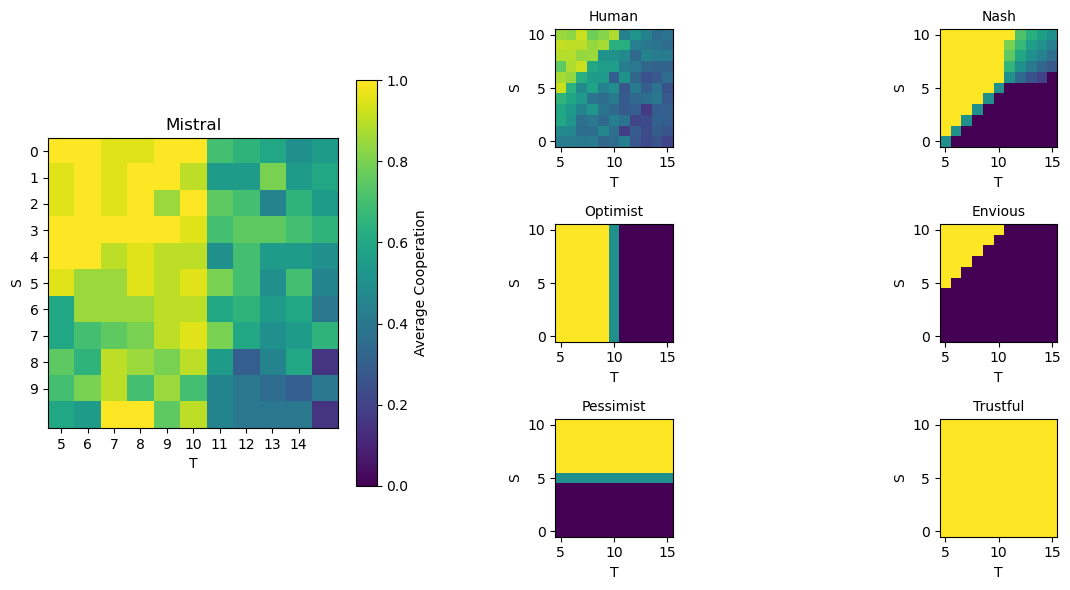

In [841]:
cmap = plt.cm.viridis

fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1)
ax1 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

small_plots = [
    (ax1, matrices_theoretical['human'], "Human"),
    (ax2, matrices_theoretical['nash'], "Nash"),
    (ax3, matrices_theoretical['optimist'], "Optimist"),
    (ax4, matrices_theoretical['envious'], "Envious"),
    (ax5, matrices_theoretical['pessimist'], "Pessimist"),
    (ax6, matrices_theoretical['trustful'], "Trustful")
]


# Heatmap gran (LLaMA)
im0 = ax0.imshow(matrices_llm['mistral_final'], aspect='equal', cmap=cmap, vmin=0, vmax=1)
ax0.set_xlabel("T")
ax0.set_ylabel("S")
ax0.set_title("Mistral", fontsize=12)
fig.colorbar(im0, ax=ax0, shrink=0.8, pad=0.05, label="Average Cooperation")

# Configuració dels ticks per al gràfic gran
ax0.set_xticks(np.arange(10)) # Neteja els ticks actuals
ax0.set_xticklabels(np.arange(5, 15)) # Posa les etiquetes de T de 5 a 15
ax0.set_yticks(np.arange(10))
ax0.set_yticklabels(np.arange(0, 10))

# Heatmaps petits (teòrics)
for ax, data, title in small_plots:
    im = ax.imshow(data, aspect='equal', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    
    # Per a l'eix X (T)
    ax.set_xticks([0, 5, 10])
    ax.set_xticklabels([5, 10, 15])
    
    # Per a l'eix Y (S)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels([10, 5, 0])
    
    # Afegir les etiquetes T i S a cada gràfic petit
    ax.set_xlabel("T")
    ax.set_ylabel("S")

plt.tight_layout()
plt.savefig('comparephenotypesmistral.jpg')
plt.show()

{'human': 0.06465702479338843, 'nash': 0.035823140495867774, 'optimist': 0.13016528925619836, 'envious': 0.29173553719008266, 'pessimist': 0.19380165289256196, 'trustful': 0.30991735537190085}


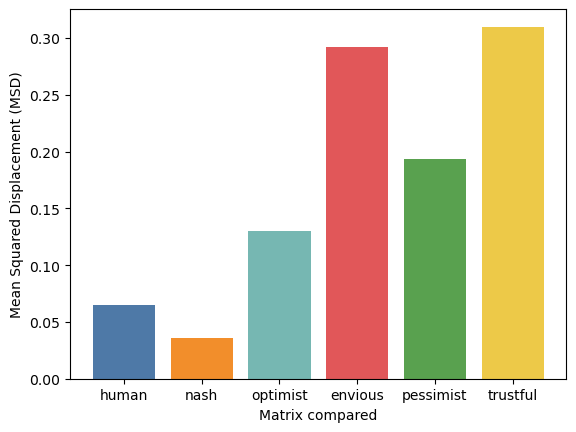

In [833]:
## QWEN VS PHENOTYPES
colors = ["#4E79A7",  
          "#F28E2B",  
          "#76B7B2",  
          "#E15759", 
          "#59A14F",
          "#EDC948"] 

comparison = ['human', 'nash', 'optimist', 'envious', 'pessimist', 'trustful']
diff_llama = {}
for element in comparison:
    diff_llama[element] = np.mean((matrices_llm['qwen_final'] - matrices_theoretical[element])**2)
print(diff_llama)

plt.bar(diff_llama.keys(), diff_llama.values(), color = colors)
plt.ylabel('Mean Squared Displacement (MSD)')
plt.xlabel('Matrix compared')
plt.savefig('msdqwen.jpg')
plt.show()

{'human': 0.7885978432997294, 'nash': 0.9261215155947019, 'optimist': 0.6774943070281373, 'envious': 0.5264051926886772, 'pessimist': 0.4925047267403122, 'trustful': nan}


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


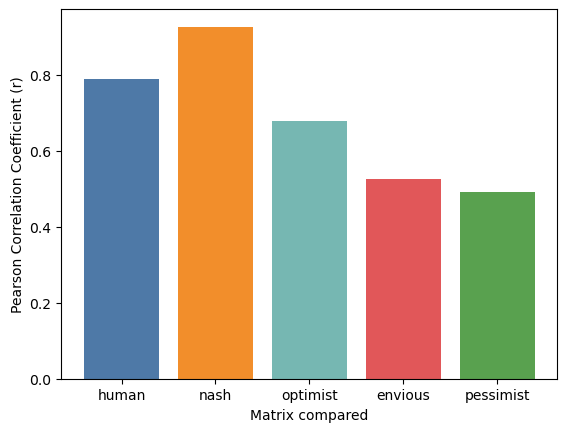

In [835]:
pearson_llama = {}
for element in comparison:
    pearson_llama[element] = np.corrcoef(matrices_llm['qwen_final'].ravel(), matrices_theoretical[element].ravel())[0, 1]

print(pearson_llama)

plt.bar(pearson_llama.keys(), pearson_llama.values(), color = colors)
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.xlabel('Matrix compared')
plt.savefig('pearsonqwen.jpg')
plt.show()

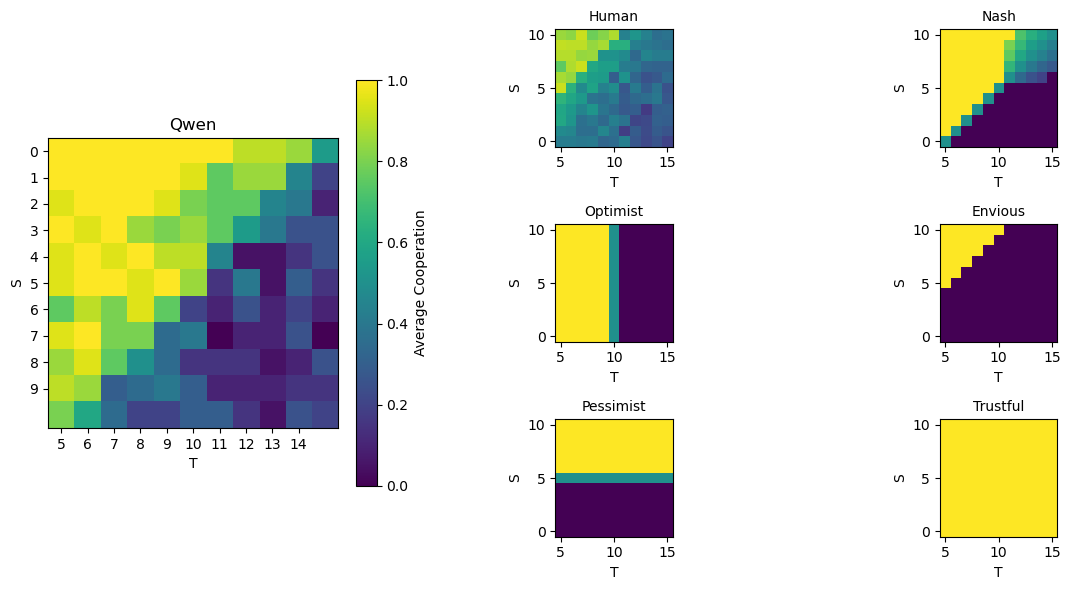

In [843]:
cmap = plt.cm.viridis

fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=1)
ax1 = plt.subplot2grid((3, 3), (0, 1), colspan=1)
ax2 = plt.subplot2grid((3, 3), (0, 2), colspan=1)
ax3 = plt.subplot2grid((3, 3), (1, 1), colspan=1)
ax4 = plt.subplot2grid((3, 3), (1, 2), colspan=1)
ax5 = plt.subplot2grid((3, 3), (2, 1), colspan=1)
ax6 = plt.subplot2grid((3, 3), (2, 2), colspan=1)

small_plots = [
    (ax1, matrices_theoretical['human'], "Human"),
    (ax2, matrices_theoretical['nash'], "Nash"),
    (ax3, matrices_theoretical['optimist'], "Optimist"),
    (ax4, matrices_theoretical['envious'], "Envious"),
    (ax5, matrices_theoretical['pessimist'], "Pessimist"),
    (ax6, matrices_theoretical['trustful'], "Trustful")
]


# Heatmap gran (LLaMA)
im0 = ax0.imshow(matrices_llm['qwen_final'], aspect='equal', cmap=cmap, vmin=0, vmax=1)
ax0.set_xlabel("T")
ax0.set_ylabel("S")
ax0.set_title("Qwen", fontsize=12)
fig.colorbar(im0, ax=ax0, shrink=0.8, pad=0.05, label="Average Cooperation")

# Configuració dels ticks per al gràfic gran
ax0.set_xticks(np.arange(10)) # Neteja els ticks actuals
ax0.set_xticklabels(np.arange(5, 15)) # Posa les etiquetes de T de 5 a 15
ax0.set_yticks(np.arange(10))
ax0.set_yticklabels(np.arange(0, 10))

# Heatmaps petits (teòrics)
for ax, data, title in small_plots:
    im = ax.imshow(data, aspect='equal', cmap=cmap, vmin=0, vmax=1)
    ax.set_title(title, fontsize=10)
    
    # Per a l'eix X (T)
    ax.set_xticks([0, 5, 10])
    ax.set_xticklabels([5, 10, 15])
    
    # Per a l'eix Y (S)
    ax.set_yticks([0, 5, 10])
    ax.set_yticklabels([10, 5, 0])
    
    # Afegir les etiquetes T i S a cada gràfic petit
    ax.set_xlabel("T")
    ax.set_ylabel("S")

plt.tight_layout()
plt.savefig('comparephenotypesqwen.jpg')
plt.show()

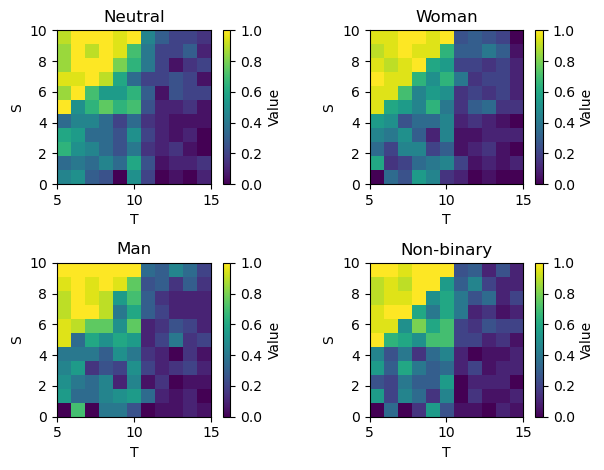

In [416]:
## LLAMA GENDER
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0,0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,0].set_xlabel("T")
axes[0,0].set_ylabel("S")
axes[0,0].set_title('Neutral')
fig.colorbar(im0, ax=axes[0,0], label="Value")

# Segon plot
im1 = axes[0,1].imshow(matrices_llm['llama_woman'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,1].set_xlabel("T")
axes[0,1].set_ylabel("S")
axes[0,1].set_title('Woman')
fig.colorbar(im1, ax=axes[0,1], label="Value")

# Tercer plot
im2 = axes[1,0].imshow(matrices_llm['llama_man'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,0].set_xlabel("T")
axes[1,0].set_ylabel("S")
axes[1,0].set_title('Man')
fig.colorbar(im2, ax=axes[1,0], label="Value")

# Tercer plot
im2 = axes[1,1].imshow(matrices_llm['llama_nb'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,1].set_xlabel("T")
axes[1,1].set_ylabel("S")
axes[1,1].set_title('Non-binary')
fig.colorbar(im2, ax=axes[1,1], label="Value")

plt.tight_layout()
plt.show()

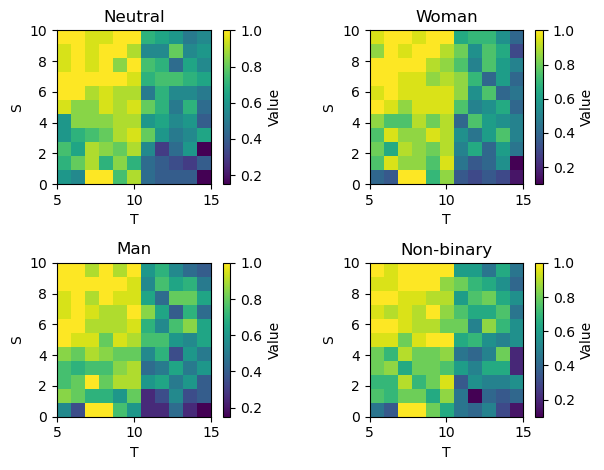

In [418]:
## MISTRAL GENDER
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0,0].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,0].set_xlabel("T")
axes[0,0].set_ylabel("S")
axes[0,0].set_title('Neutral')
fig.colorbar(im0, ax=axes[0,0], label="Value")

# Segon plot
im1 = axes[0,1].imshow(matrices_llm['mistral_woman'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,1].set_xlabel("T")
axes[0,1].set_ylabel("S")
axes[0,1].set_title('Woman')
fig.colorbar(im1, ax=axes[0,1], label="Value")

# Tercer plot
im2 = axes[1,0].imshow(matrices_llm['mistral_man'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,0].set_xlabel("T")
axes[1,0].set_ylabel("S")
axes[1,0].set_title('Man')
fig.colorbar(im2, ax=axes[1,0], label="Value")

# Tercer plot
im2 = axes[1,1].imshow(matrices_llm['mistral_nb'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,1].set_xlabel("T")
axes[1,1].set_ylabel("S")
axes[1,1].set_title('Non-binary')
fig.colorbar(im2, ax=axes[1,1], label="Value")

plt.tight_layout()
plt.show()

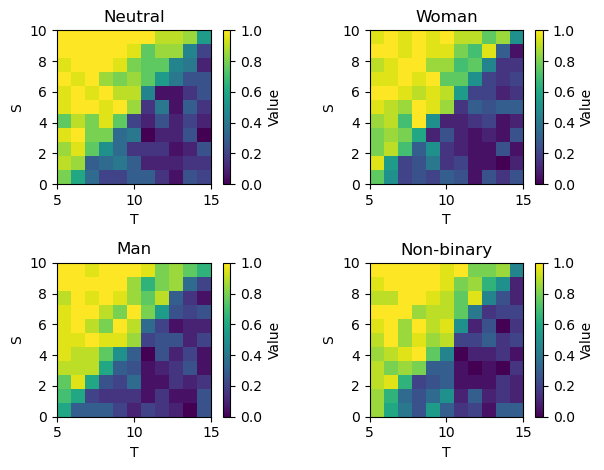

In [420]:
## QWEN GENDER
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0,0].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,0].set_xlabel("T")
axes[0,0].set_ylabel("S")
axes[0,0].set_title('Neutral')
fig.colorbar(im0, ax=axes[0,0], label="Value")

# Segon plot
im1 = axes[0,1].imshow(matrices_llm['qwen_woman'], extent=[5, 15, 0, 10], aspect='equal')
axes[0,1].set_xlabel("T")
axes[0,1].set_ylabel("S")
axes[0,1].set_title('Woman')
fig.colorbar(im1, ax=axes[0,1], label="Value")

# Tercer plot
im2 = axes[1,0].imshow(matrices_llm['qwen_man'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,0].set_xlabel("T")
axes[1,0].set_ylabel("S")
axes[1,0].set_title('Man')
fig.colorbar(im2, ax=axes[1,0], label="Value")

# Tercer plot
im2 = axes[1,1].imshow(matrices_llm['qwen_nb'], extent=[5, 15, 0, 10], aspect='equal')
axes[1,1].set_xlabel("T")
axes[1,1].set_ylabel("S")
axes[1,1].set_title('Non-binary')
fig.colorbar(im2, ax=axes[1,1], label="Value")

plt.tight_layout()
plt.show()

# Ethnicity

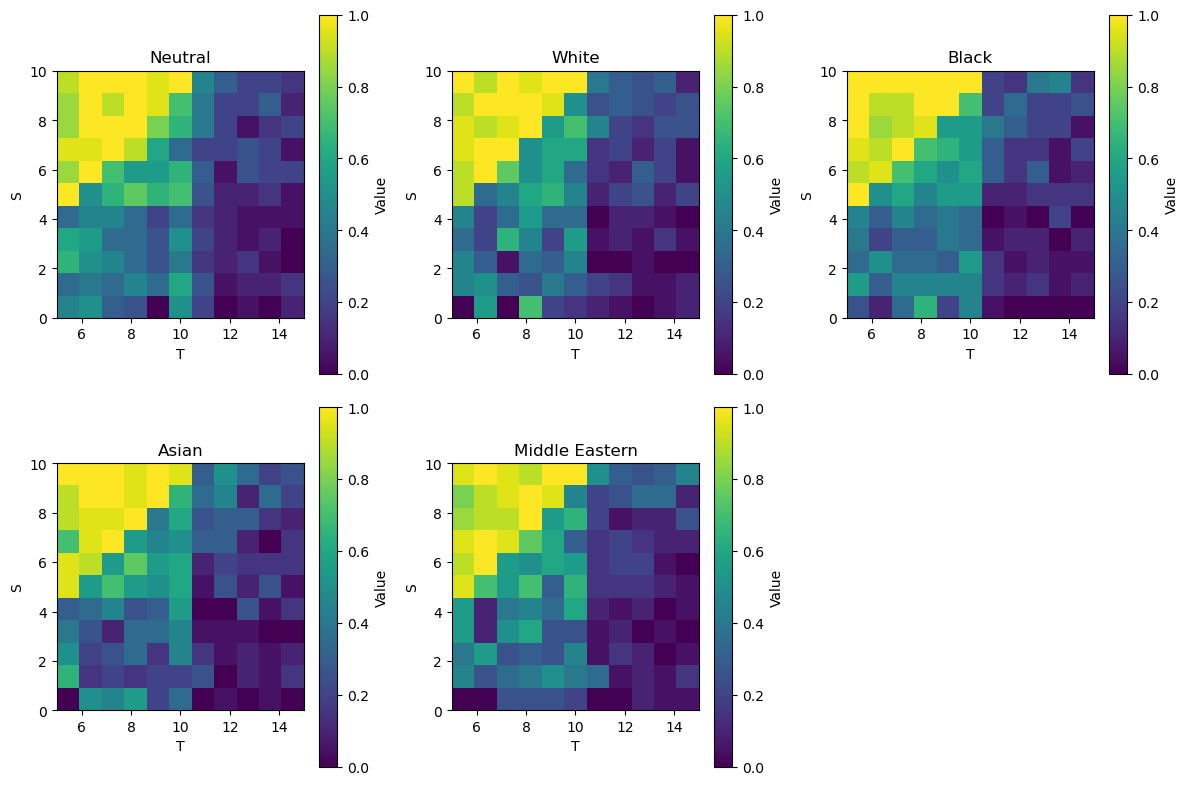

In [292]:
## LLAMA
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 files x 3 columnes
axes = axes.flatten()

# 1. Neutral
im0 = axes[0].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_title('Neutral')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
fig.colorbar(im0, ax=axes[0], label="Value")

# 2. Woman
im1 = axes[1].imshow(matrices_llm['llama_white'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_title('White')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
fig.colorbar(im1, ax=axes[1], label="Value")

# 3. Man
im2 = axes[2].imshow(matrices_llm['llama_black'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_title('Black')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
fig.colorbar(im2, ax=axes[2], label="Value")

# 4. Non-binary
im3 = axes[3].imshow(matrices_llm['llama_asian'], extent=[5, 15, 0, 10], aspect='equal')
axes[3].set_title('Asian')
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
fig.colorbar(im3, ax=axes[3], label="Value")

# 5. Fifth category (exemple: 'qwen_other')
im4 = axes[4].imshow(matrices_llm['llama_ME'], extent=[5, 15, 0, 10], aspect='equal')
axes[4].set_title('Middle Eastern')
axes[4].set_xlabel("T")
axes[4].set_ylabel("S")
fig.colorbar(im4, ax=axes[4], label="Value")

# Eliminar l’últim subplot buit (perquè 2x3=6 i només volem 5)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


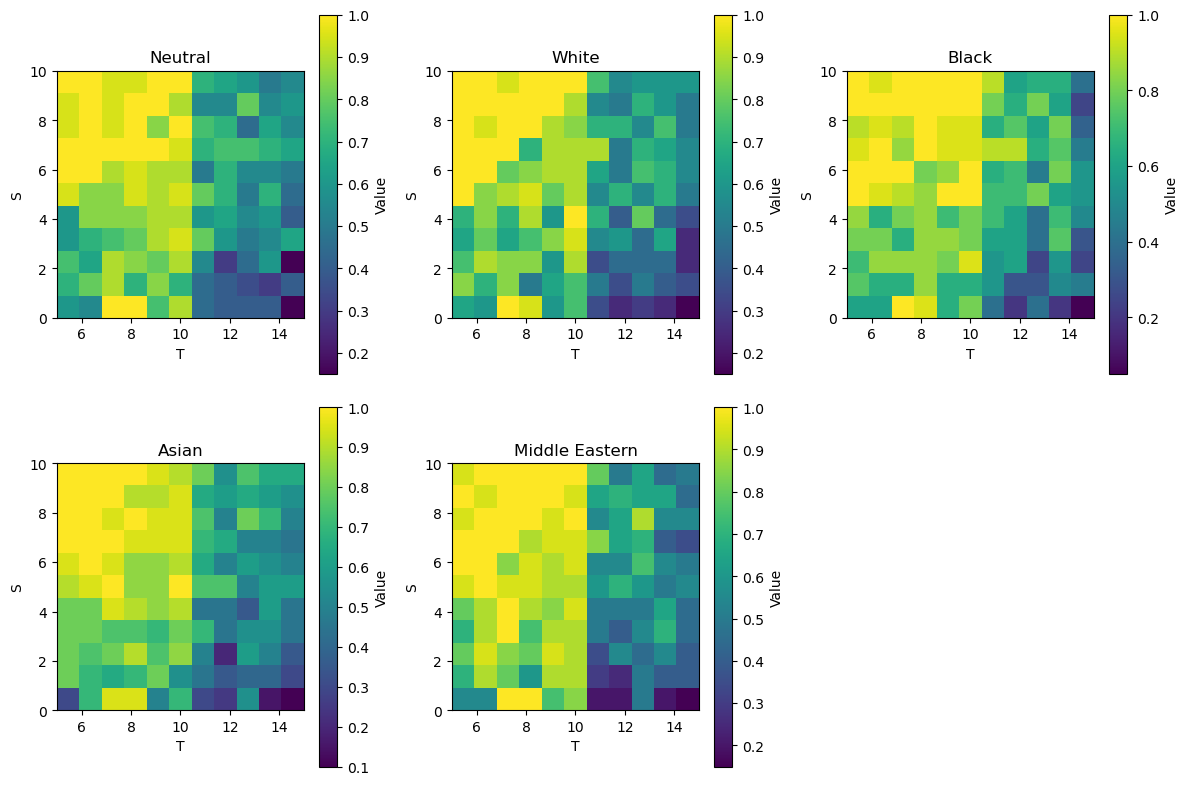

In [294]:
## MISTRAL
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 files x 3 columnes
axes = axes.flatten()

# 1. Neutral
im0 = axes[0].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_title('Neutral')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
fig.colorbar(im0, ax=axes[0], label="Value")

# 2. Woman
im1 = axes[1].imshow(matrices_llm['mistral_white'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_title('White')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
fig.colorbar(im1, ax=axes[1], label="Value")

# 3. Man
im2 = axes[2].imshow(matrices_llm['mistral_black'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_title('Black')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
fig.colorbar(im2, ax=axes[2], label="Value")

# 4. Non-binary
im3 = axes[3].imshow(matrices_llm['mistral_asian'], extent=[5, 15, 0, 10], aspect='equal')
axes[3].set_title('Asian')
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
fig.colorbar(im3, ax=axes[3], label="Value")

# 5. Fifth category (exemple: 'qwen_other')
im4 = axes[4].imshow(matrices_llm['mistral_ME'], extent=[5, 15, 0, 10], aspect='equal')
axes[4].set_title('Middle Eastern')
axes[4].set_xlabel("T")
axes[4].set_ylabel("S")
fig.colorbar(im4, ax=axes[4], label="Value")

# Eliminar l’últim subplot buit (perquè 2x3=6 i només volem 5)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

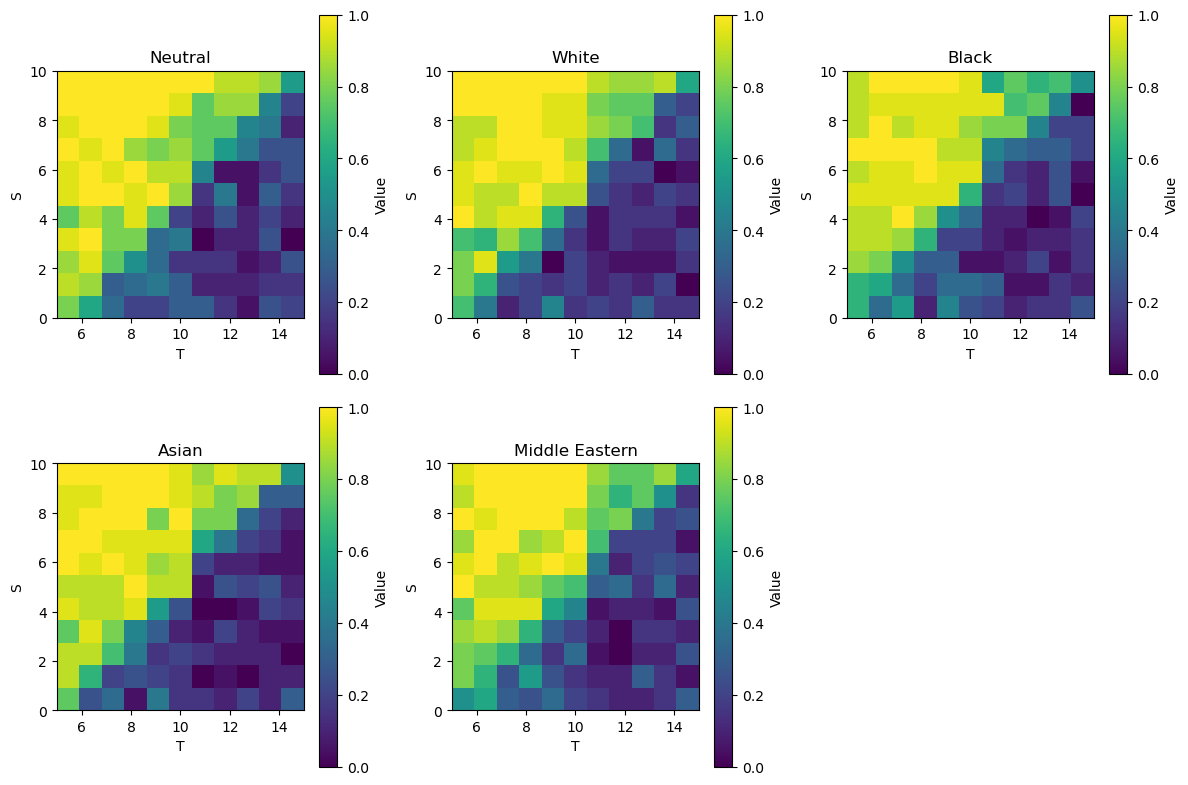

In [296]:
## QWEN
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 files x 3 columnes
axes = axes.flatten()

# 1. Neutral
im0 = axes[0].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_title('Neutral')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
fig.colorbar(im0, ax=axes[0], label="Value")

# 2. Woman
im1 = axes[1].imshow(matrices_llm['qwen_white'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_title('White')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
fig.colorbar(im1, ax=axes[1], label="Value")

# 3. Man
im2 = axes[2].imshow(matrices_llm['qwen_black'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_title('Black')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
fig.colorbar(im2, ax=axes[2], label="Value")

# 4. Non-binary
im3 = axes[3].imshow(matrices_llm['qwen_asian'], extent=[5, 15, 0, 10], aspect='equal')
axes[3].set_title('Asian')
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
fig.colorbar(im3, ax=axes[3], label="Value")

# 5. Fifth category (exemple: 'qwen_other')
im4 = axes[4].imshow(matrices_llm['qwen_ME'], extent=[5, 15, 0, 10], aspect='equal')
axes[4].set_title('Middle Eastern')
axes[4].set_xlabel("T")
axes[4].set_ylabel("S")
fig.colorbar(im4, ax=axes[4], label="Value")

# Eliminar l’últim subplot buit (perquè 2x3=6 i només volem 5)
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## MONEY


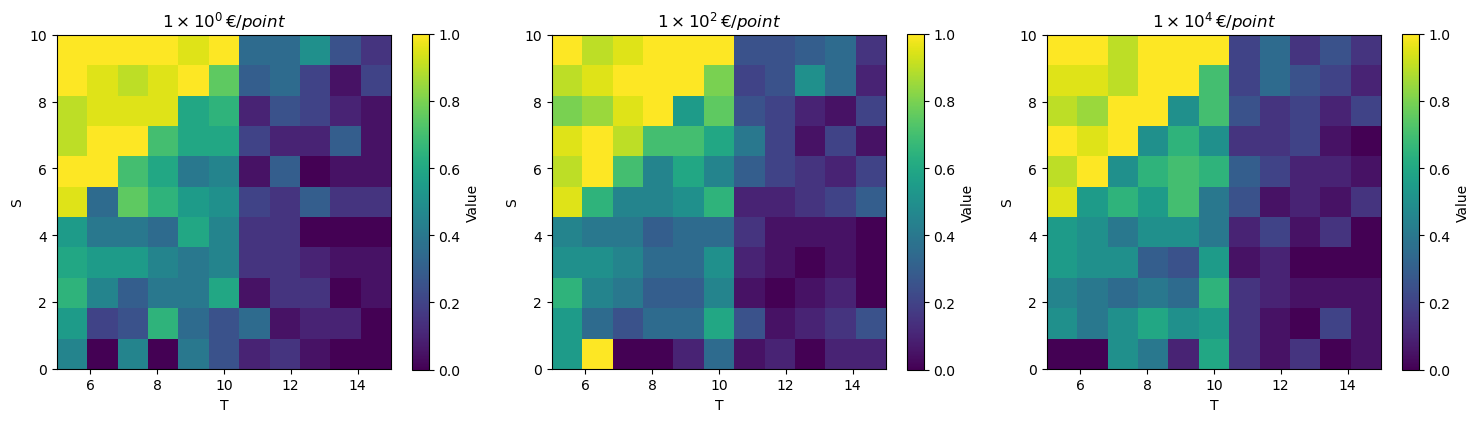

In [621]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0].imshow(matrices_llm['llama_oneeuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title(r"$1\times10^{0}\,€/point$")
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['llama_100euro'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title(r"$1\times10^{2}\,€/point$")
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_10keuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title(r"$1\times10^{4}\,€/point$")
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

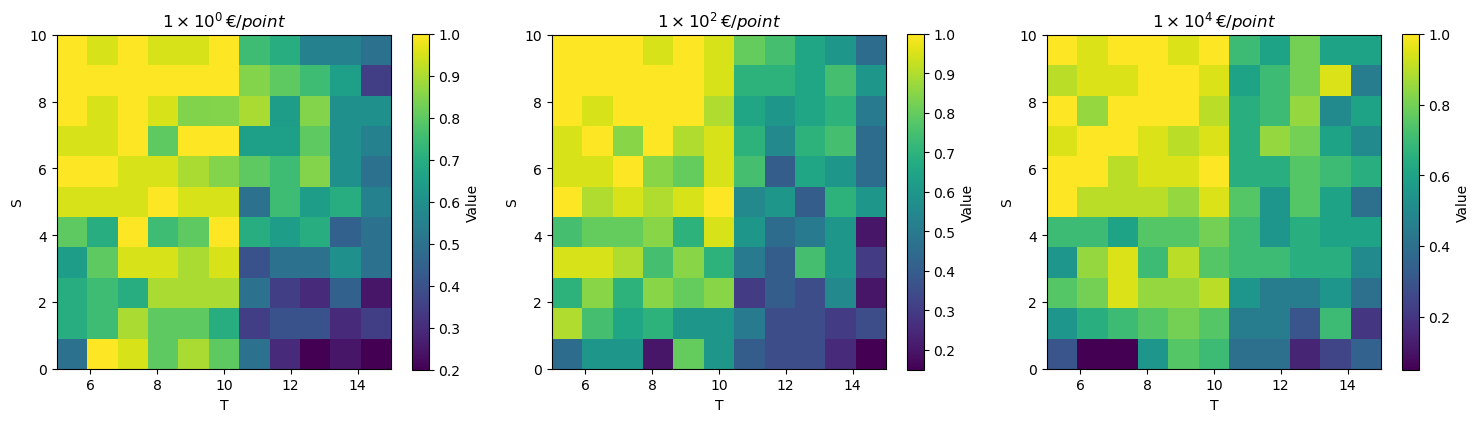

In [619]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0].imshow(matrices_llm['mistral_oneeuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title(r"$1\times10^{0}\,€/point$")
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['mistral_100euro'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title(r"$1\times10^{2}\,€/point$")
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['mistral_10keuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title(r"$1\times10^{4}\,€/point$")
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

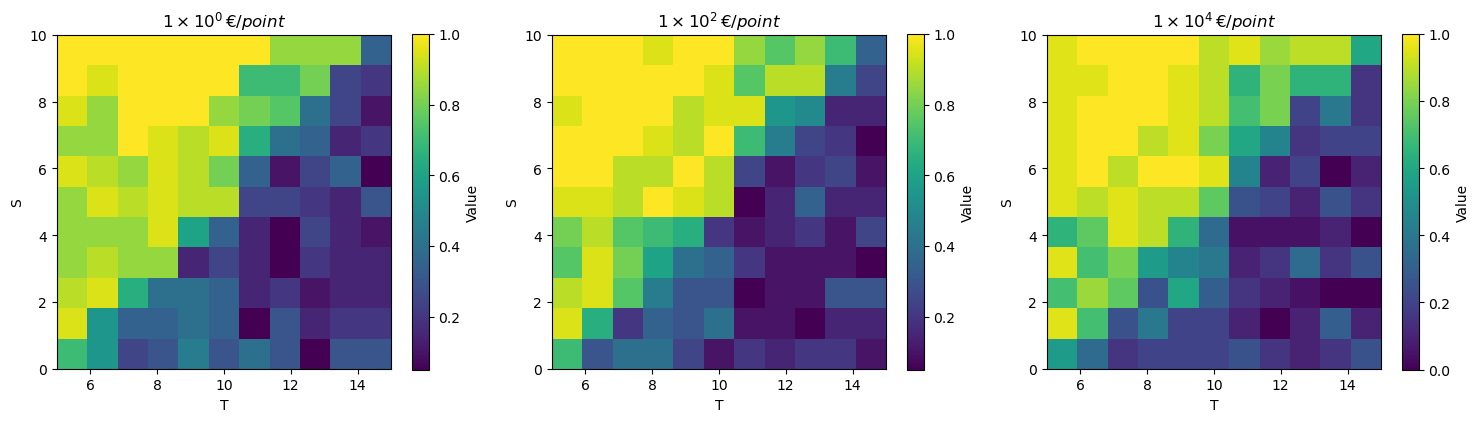

In [617]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 fila, 3 columnes

# Primer plot
im0 = axes[0].imshow(matrices_llm['qwen_oneeuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title(r"$1\times10^{0}\,€/point$")
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['qwen_100euro'], extent=[5, 15, 0, 10], aspect='equal')
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title(r"$1\times10^{2}\,€/point$")
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['qwen_10keuro'], extent=[5, 15, 0, 10], aspect='equal')
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title(r"$1\times10^{4}\,€/point$")
fig.colorbar(im2, ax=axes[2], label="Value")

plt.tight_layout()
plt.show()

## Extraction methods

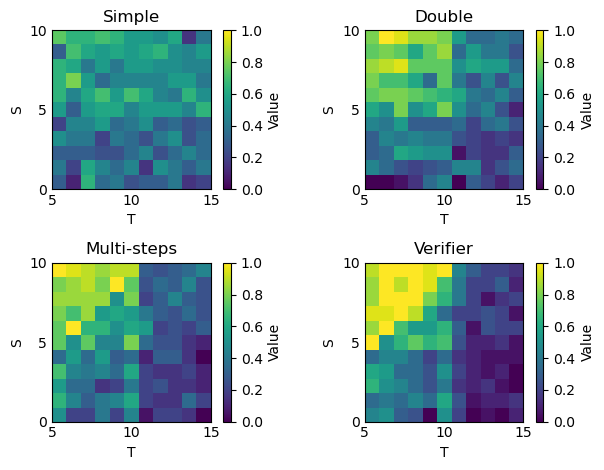

In [902]:
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

# Primer plot
im0 = axes[0].imshow(matrices_llm['llama_simple'], extent=[5, 15, 0, 10], aspect='equal',vmin=0, vmax=1 )
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title('Simple')
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['llama_extract'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title('Double')
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['llama_multi'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title('Multi-steps')
fig.colorbar(im2, ax=axes[2], label="Value")

# Tercer plot
im2 = axes[3].imshow(matrices_llm['llama_final'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
axes[3].set_title('Verifier')
fig.colorbar(im2, ax=axes[3], label="Value")


plt.tight_layout()
plt.savefig('methodsllama.jpg')
plt.show()

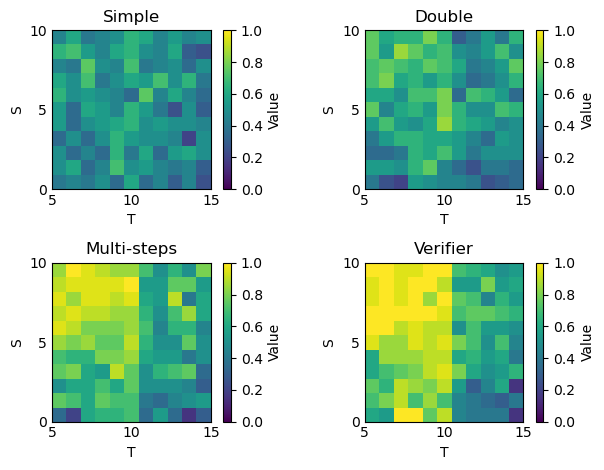

In [904]:
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

# Primer plot
im0 = axes[0].imshow(matrices_llm['mistral_simple'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title('Simple')
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['mistral_extract'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title('Double')
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['mistral_multi'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title('Multi-steps')
fig.colorbar(im2, ax=axes[2], label="Value")

# Tercer plot
im2 = axes[3].imshow(matrices_llm['mistral_final'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
axes[3].set_title('Verifier')
fig.colorbar(im2, ax=axes[3], label="Value")


plt.tight_layout()
plt.savefig('methodsmistral.jpg')
plt.show()

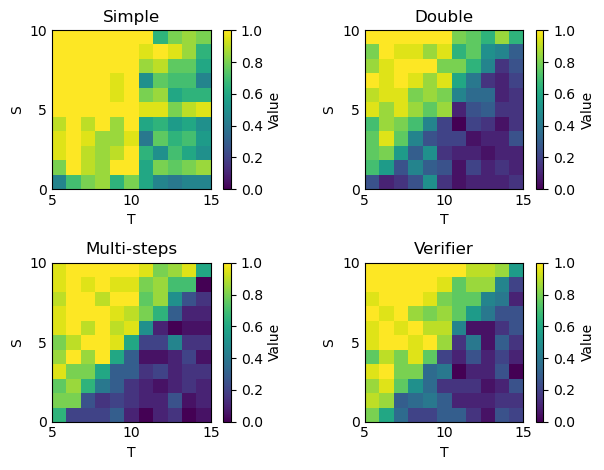

In [906]:
fig, axes = plt.subplots(2, 2)  # 1 fila, 3 columnes
axes = axes.flatten()

for ax in axes:
    ax.set_xticks([5, 10, 15])
    ax.set_yticks([10, 5, 0])
    ax.tick_params(axis='x', length=0)
    ax.tick_params(axis='y', length=0)

# Primer plot
im0 = axes[0].imshow(matrices_llm['qwen_simple'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[0].set_xlabel("T")
axes[0].set_ylabel("S")
axes[0].set_title('Simple')
fig.colorbar(im0, ax=axes[0], label="Value")

# Segon plot
im1 = axes[1].imshow(matrices_llm['qwen_extract'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[1].set_xlabel("T")
axes[1].set_ylabel("S")
axes[1].set_title('Double')
fig.colorbar(im1, ax=axes[1], label="Value")

# Tercer plot
im2 = axes[2].imshow(matrices_llm['qwen_multi'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[2].set_xlabel("T")
axes[2].set_ylabel("S")
axes[2].set_title('Multi-steps')
fig.colorbar(im2, ax=axes[2], label="Value")

# Tercer plot
im2 = axes[3].imshow(matrices_llm['qwen_final'], extent=[5, 15, 0, 10], aspect='equal', vmin = 0, vmax=1)
axes[3].set_xlabel("T")
axes[3].set_ylabel("S")
axes[3].set_title('Verifier')
fig.colorbar(im2, ax=axes[3], label="Value")


plt.tight_layout()
plt.savefig('methodsqwen.jpg')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

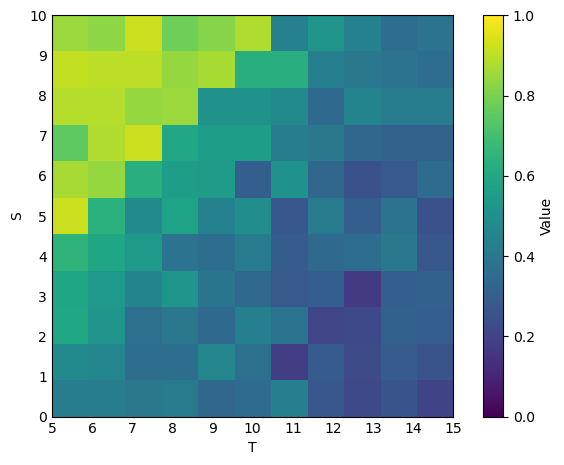

In [896]:
plt.imshow(
    matrices_theoretical['human'],
    extent=[5, 15, 0, 10],
    aspect='equal',
    cmap='viridis',
    vmin=0,   # forcem que el mínim de l'escala sigui 0
    vmax=1 )   # forcem que el màxim sigui 1
plt.xlabel("T")
plt.ylabel("S")
plt.colorbar(label="Value")
plt.tight_layout()

plt.xticks(np.arange(5,16))
plt.yticks(np.arange(0,11))
# Treure les ratlletes, deixar només números
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.savefig('human.jpg')
plt.show

In [767]:
mu_llama = np.mean(cooperation_llama)

In [769]:
sigma_llama = np.std(cooperation_llama, ddof=1)

In [779]:
mu_llama = np.mean(cooperation_llama)
print(mu_llama)
sigma_llama = np.std(cooperation_llama, ddof=1)
print(sigma_llama)
for version in versions:
    key = f"llama_{version}"
    avg = np.mean(matrices_llm[key])
    z_value = (avg - mu_llama)/sigma_llama
    p_value = 2*(1 - stats.norm.cdf(abs(z_value)))
    print('value:', avg)
    print('z:', z_value)
    print('p:', p_value)

value: 0.38884297520661154
z: -1.8842763707050332
p: 0.05952760191289941
value: 0.4078512396694215
z: 0.898920837400575
p: 0.368694828064837
value: 0.38884297520661154
z: -1.8842763707050332
p: 0.05952760191289941
value: 0.3847107438016529
z: -2.489319242032336
p: 0.012798798261294042
value: 0.3962809917355372
z: -0.7951992023158765
p: 0.42649763573692745
value: 0.3785123966942148
z: -3.3968835490232987
p: 0.0006815796541621566
value: 0.3822314049586777
z: -2.852344964828716
p: 0.004339797615634522
value: 0.40661157024793393
z: 0.717407976002389
p: 0.4731223996001095
value: 0.4045454545454545
z: 0.4148865403387213
p: 0.6782249634406607
value: 0.4033057851239669
z: 0.23337367894053532
p: 0.8154712500983456


In [777]:
versions

['woman',
 'man',
 'nb',
 'white',
 'black',
 'ME',
 'asian',
 'oneeuro',
 '100euro',
 '10keuro']

In [783]:
mu_mistral = np.mean(cooperation_mistral)
print(mu_mistral)
sigma_mistral = np.std(cooperation_mistral, ddof=1)
print(sigma_mistral)
for version in versions:
    key = f"mistral_{version}"
    avg = np.mean(matrices_llm[key])
    z_value = (avg - mu_mistral)/sigma_mistral
    p_value = 2*(1 - stats.norm.cdf(abs(z_value)))
    print('value:', avg)
    print('z:', z_value)
    print('p:', p_value)

0.7221369539551358
0.007078770907715463
value: 0.7305785123966942
z: 1.1925175361103504
p: 0.2330583789034839
value: 0.7305785123966942
z: 1.1925175361103504
p: 0.2330583789034839
value: 0.7181818181818183
z: -0.5587319924432987
p: 0.5763446418881437
value: 0.7119834710743802
z: -1.4343567567201312
p: 0.15147048129148577
value: 0.7318181818181818
z: 1.3676424889657104
p: 0.1714240098824067
value: 0.7334710743801653
z: 1.6011424261062064
p: 0.10934537722567361
value: 0.712396694214876
z: -1.3759817724350267
p: 0.16882727656303453
value: 0.7421487603305785
z: 2.8270170960937593
p: 0.004698381946642627
value: 0.7053719008264463
z: -2.3683565052820836
p: 0.01786730983632423
value: 0.7227272727272728
z: 0.08339283469303763
p: 0.9335391857544655


In [785]:
mu_qwen = np.mean(cooperation_qwen)
print(mu_qwen)
sigma_qwen = np.std(cooperation_qwen, ddof=1)
print(sigma_qwen)
for version in versions:
    key = f"qwen_{version}"
    avg = np.mean(matrices_llm[key])
    z_value = (avg - mu_qwen)/sigma_qwen
    p_value = 2*(1 - stats.norm.cdf(abs(z_value)))
    print('value:', avg)
    print('z:', z_value)
    print('p:', p_value)

0.5684854106932029
0.00727885627502161
value: 0.5433884297520661
z: -3.4479291791020095
p: 0.0005649021373892449
value: 0.5380165289256198
z: -4.185943590085882
p: 2.839838752222157e-05
value: 0.562809917355372
z: -0.7797232316987954
p: 0.43555380136120836
value: 0.5450413223140498
z: -3.2208478218761813
p: 0.0012781199508349328
value: 0.5330578512396694
z: -4.867187661763291
p: 1.1319753083771644e-06
value: 0.5479338842975207
z: -2.823455446731051
p: 0.004750902855997774
value: 0.5334710743801653
z: -4.810417322456841
p: 1.506154951202987e-06
value: 0.5669421487603307
z: -0.212019838634286
p: 0.8320915571559611
value: 0.5574380165289256
z: -1.5177376426826836
p: 0.12908055053454426
value: 0.5442148760330578
z: -3.3343885004891107
p: 0.0008548716598044681


In [894]:
np.mean(matrices_theoretical['human'])

0.47991735537190083